Below is the process we can follow for the task of stock market anomaly detection:
- Gather historical stock market data, including prices (open, high, low, close, adjusted close) and trading volumes.
- Develop additional features that may help in detecting anomalies, such as moving averages, relative strength index (RSI), or percentage changes over specific periods.
- Visualize the data to identify potential outliers or unusual patterns across time.
- Employ statistical methods like Z-score analysis, where data points that are a certain number of standard deviations away from the mean are flagged as anomalies.
- Use the insights gained from anomaly detection to inform investment decisions, risk management, and strategic planning.

# Collect real-time stock market data

In [24]:
!pip install yfinance

In [25]:
import pandas as pd
import yfinance as yf
from datetime import date, timedelta

# define the time period for the data
end_date = date.today().strftime("%Y-%m-%d")
start_date = (date.today() - timedelta(days=365)).strftime("%Y-%m-%d")

# list of stock tickers to download
tickers = ['AAPL', 'MSFT', 'NFLX', 'GOOG', 'TSLA']

In [26]:
data = yf.download(tickers, start=start_date, end=end_date, progress=False)
data.head()

Price                       Adj Close                                      \
Ticker                           AAPL        GOOG        MSFT        NFLX   
Date                                                                        
2023-09-05 00:00:00+00:00  188.734222  136.554611  331.065002  448.679993   
2023-09-06 00:00:00+00:00  181.978806  135.216125  330.400024  445.760010   
2023-09-07 00:00:00+00:00  176.656036  136.045181  327.452118  443.140015   
2023-09-08 00:00:00+00:00  177.272873  137.044052  331.779633  442.799988   
2023-09-11 00:00:00+00:00  178.446854  137.583435  335.422333  445.359985   

Price                                       Close                          \
Ticker                           TSLA        AAPL        GOOG        MSFT   
Date                                                                        
2023-09-05 00:00:00+00:00  256.489990  189.699997  136.710007  333.549988   
2023-09-06 00:00:00+00:00  251.919998  182.910004  135.369995  332.880005   
2023-09-07 00:00:00+00:00  251.490005  177.559998  136.199997  329.910004   
2023-09-08 00:00:00+00:00  248.500000  178.179993  137.199997  334.269989   
2023-09-11 00:00:00+00:00  273.579987  179.360001  137.740005  337.940002   

Price                                              ...        Open  \
Ticker                           NFLX        TSLA  ...        AAPL   
Date                                               ...               
2023-09-05 00:00:00+00:00  448.679993  256.489990  ...  188.279999   
2023-09-06 00:00:00+00:00  445.760010  251.919998  ...  188.399994   
2023-09-07 00:00:00+00:00  443.140015  251.490005  ...  175.179993   
2023-09-08 00:00:00+00:00  442.799988  248.500000  ...  178.350006   
2023-09-11 00:00:00+00:00  445.359985  273.579987  ...  180.070007   

Price                                                                      \
Ticker                           GOOG        MSFT        NFLX        TSLA   
Date                                                                        
2023-09-05 00:00:00+00:00  136.440002  329.000000  438.390015  245.000000   
2023-09-06 00:00:00+00:00  137.014999  333.380005  448.609985  255.139999   
2023-09-07 00:00:00+00:00  134.600006  331.290009  441.149994  245.070007   
2023-09-08 00:00:00+00:00  135.869995  330.089996  443.559998  251.220001   
2023-09-11 00:00:00+00:00  137.380005  337.239990  443.070007  264.269989   

Price                         Volume                                          
Ticker                          AAPL      GOOG      MSFT     NFLX       TSLA  
Date                                                                          
2023-09-05 00:00:00+00:00   45280000  17730200  18553900  6155900  129469600  
2023-09-06 00:00:00+00:00   81755800  15814300  17535800  3862300  116959800  
2023-09-07 00:00:00+00:00  112488800  16976000  18381000  2922700  115312900  
2023-09-08 00:00:00+00:00   65551300  17810700  19530100  2697500  118367700  
2023-09-11 00:00:00+00:00   58953100  17180800  16583300  2913800  174667900  

[5 rows x 30 columns]

In [27]:
# reset index to bring Date into the columns for the melt function
data = data.reset_index()
data

Price                       Date   Adj Close                          \
Ticker                                  AAPL        GOOG        MSFT   
0      2023-09-05 00:00:00+00:00  188.734222  136.554611  331.065002   
1      2023-09-06 00:00:00+00:00  181.978806  135.216125  330.400024   
2      2023-09-07 00:00:00+00:00  176.656036  136.045181  327.452118   
3      2023-09-08 00:00:00+00:00  177.272873  137.044052  331.779633   
4      2023-09-11 00:00:00+00:00  178.446854  137.583435  335.422333   
..                           ...         ...         ...         ...   
246    2024-08-27 00:00:00+00:00  228.029999  166.380005  413.839996   
247    2024-08-28 00:00:00+00:00  226.490005  164.500000  410.600006   
248    2024-08-29 00:00:00+00:00  229.789993  163.399994  413.119995   
249    2024-08-30 00:00:00+00:00  229.000000  165.110001  417.140015   
250    2024-09-03 00:00:00+00:00  222.770004  158.610001  409.440002   

Price                                Close                          \
Ticker        NFLX        TSLA        AAPL        GOOG        MSFT   
0       448.679993  256.489990  189.699997  136.710007  333.549988   
1       445.760010  251.919998  182.910004  135.369995  332.880005   
2       443.140015  251.490005  177.559998  136.199997  329.910004   
3       442.799988  248.500000  178.179993  137.199997  334.269989   
4       445.359985  273.579987  179.360001  137.740005  337.940002   
..             ...         ...         ...         ...         ...   
246     695.719971  209.210007  228.029999  166.380005  413.839996   
247     683.840027  205.750000  226.490005  164.500000  410.600006   
248     692.479980  206.279999  229.789993  163.399994  413.119995   
249     701.349976  214.110001  229.000000  165.110001  417.140015   
250     675.320007  210.600006  222.770004  158.610001  409.440002   

Price               ...        Open                                      \
Ticker        NFLX  ...        AAPL        GOOG        MSFT        NFLX   
0       448.679993  ...  188.279999  136.440002  329.000000  438.390015   
1       445.760010  ...  188.399994  137.014999  333.380005  448.609985   
2       443.140015  ...  175.179993  134.600006  331.290009  441.149994   
3       442.799988  ...  178.350006  135.869995  330.089996  443.559998   
4       445.359985  ...  180.070007  137.380005  337.239990  443.070007   
..             ...  ...         ...         ...         ...         ...   
246     695.719971  ...  226.000000  167.610001  412.859985  688.530029   
247     683.840027  ...  227.919998  166.779999  414.880005  695.830017   
248     692.479980  ...  230.100006  166.059998  414.940002  690.000000   
249     701.349976  ...  230.190002  164.220001  415.600006  700.359985   
250     675.320007  ...  228.610001  163.270004  417.989990  701.000000   

Price                  Volume                                          
Ticker        TSLA       AAPL      GOOG      MSFT     NFLX       TSLA  
0       245.000000   45280000  17730200  18553900  6155900  129469600  
1       255.139999   81755800  15814300  17535800  3862300  116959800  
2       245.070007  112488800  16976000  18381000  2922700  115312900  
3       251.220001   65551300  17810700  19530100  2697500  118367700  
4       264.269989   58953100  17180800  16583300  2913800  174667900  
..             ...        ...       ...       ...      ...        ...  
246     213.250000   35934600  13718200  13492900  3164900   62821400  
247     209.720001   38052200  15208700  14882700  2430600   64116400  
248     209.800003   51906300  17133800  17045200  2187000   62308800  
249     208.630005   52958500  18492300  24298300  3264700   63246000  
250     215.253006   48082190  24730844  19788534  3082449   76297792  

[251 rows x 31 columns]

In [28]:
# melt the DataFrame to make it long format where each row is a unique combination of Date, Ticker, and attributes
data_melted = data.melt(id_vars=['Date'], var_name=['Attribute', 'Ticker'])
data_melted

,Date,Attribute,Ticker,value
0,2023-09-05 00:00:00+00:00,Adj Close,AAPL,1.887342e+02
1,2023-09-06 00:00:00+00:00,Adj Close,AAPL,1.819788e+02
2,2023-09-07 00:00:00+00:00,Adj Close,AAPL,1.766560e+02
3,2023-09-08 00:00:00+00:00,Adj Close,AAPL,1.772729e+02
4,2023-09-11 00:00:00+00:00,Adj Close,AAPL,1.784469e+02
...,...,...,...,...
7525,2024-08-27 00:00:00+00:00,Volume,TSLA,6.282140e+07
7526,2024-08-28 00:00:00+00:00,Volume,TSLA,6.411640e+07
7527,2024-08-29 00:00:00+00:00,Volume,TSLA,6.230880e+07
7528,2024-08-30 00:00:00+00:00,Volume,TSLA,6.324600e+07


In [29]:
# pivot the melted DataFrame to have the attributes (Open, High, Low, etc.) as columns
data_pivoted = data_melted.pivot_table(index=['Date', 'Ticker'], columns='Attribute', values='value', aggfunc='first')
data_pivoted

Attribute                          Adj Close       Close        High  \
Date                      Ticker                                       
2023-09-05 00:00:00+00:00 AAPL    188.734222  189.699997  189.979996   
                          GOOG    136.554611  136.710007  137.369995   
                          MSFT    331.065002  333.549988  334.850006   
                          NFLX    448.679993  448.679993  453.450012   
                          TSLA    256.489990  256.489990  258.000000   
...                                      ...         ...         ...   
2024-09-03 00:00:00+00:00 AAPL    222.770004  222.770004  229.000000   
                          GOOG    158.610001  158.610001  163.380005   
                          MSFT    409.440002  409.440002  419.880005   
                          NFLX    675.320007  675.320007  703.859985   
                          TSLA    210.600006  210.600006  219.899994   

Attribute                                Low        Open       Volume  
Date                      Ticker                                       
2023-09-05 00:00:00+00:00 AAPL    187.610001  188.279999   45280000.0  
                          GOOG    135.559998  136.440002   17730200.0  
                          MSFT    328.660004  329.000000   18553900.0  
                          NFLX    438.000000  438.390015    6155900.0  
                          TSLA    244.860001  245.000000  129469600.0  
...                                      ...         ...          ...  
2024-09-03 00:00:00+00:00 AAPL    221.169998  228.610001   48082190.0  
                          GOOG    157.860001  163.270004   24730844.0  
                          MSFT    407.029999  417.989990   19788534.0  
                          NFLX    671.010010  701.000000    3082449.0  
                          TSLA    209.640106  215.253006   76297792.0  

[1255 rows x 6 columns]

In [30]:
# reset index to turn multi-index into columns
stock_data = data_pivoted.reset_index()
stock_data

Attribute,Date,Ticker,Adj Close,Close,High,Low,Open,Volume
0,2023-09-05 00:00:00+00:00,AAPL,188.734222,189.699997,189.979996,187.610001,188.279999,45280000.0
1,2023-09-05 00:00:00+00:00,GOOG,136.554611,136.710007,137.369995,135.559998,136.440002,17730200.0
2,2023-09-05 00:00:00+00:00,MSFT,331.065002,333.549988,334.850006,328.660004,329.000000,18553900.0
3,2023-09-05 00:00:00+00:00,NFLX,448.679993,448.679993,453.450012,438.000000,438.390015,6155900.0
4,2023-09-05 00:00:00+00:00,TSLA,256.489990,256.489990,258.000000,244.860001,245.000000,129469600.0
...,...,...,...,...,...,...,...,...
1250,2024-09-03 00:00:00+00:00,AAPL,222.770004,222.770004,229.000000,221.169998,228.610001,48082190.0
1251,2024-09-03 00:00:00+00:00,GOOG,158.610001,158.610001,163.380005,157.860001,163.270004,24730844.0
1252,2024-09-03 00:00:00+00:00,MSFT,409.440002,409.440002,419.880005,407.029999,417.989990,19788534.0
1253,2024-09-03 00:00:00+00:00,NFLX,675.320007,675.320007,703.859985,671.010010,701.000000,3082449.0


The data we collected contains the following columns:
- Date: The date of the stock data entry.
- Ticker: The stock ticker symbol.
- Adj Close: The adjusted closing price of the stock, which accounts for any corporate actions like splits or dividends.
- Close: The closing price of the stock.
- High: The highest price of the stock during the trading day.
- Low: The lowest price of the stock during the trading day.
- Open: The opening price of the stock.
- Volume: The number of shares traded during the day.

Now, let’s make some necessary transformations in the dataset before moving forward

In [31]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1255 entries, 0 to 1254
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   Date       1255 non-null   datetime64[ns, UTC]
 1   Ticker     1255 non-null   object             
 2   Adj Close  1255 non-null   float64            
 3   Close      1255 non-null   float64            
 4   High       1255 non-null   float64            
 5   Low        1255 non-null   float64            
 6   Open       1255 non-null   float64            
 7   Volume     1255 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(6), object(1)
memory usage: 78.6+ KB


In [32]:
# convert the 'Date' column to datetime format
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

# set the 'Date' column as the index of the dataframe
stock_data.set_index('Date', inplace=True)
stock_data

Attribute,Ticker,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,,
2023-09-05 00:00:00+00:00,AAPL,188.734222,189.699997,189.979996,187.610001,188.279999,45280000.0
2023-09-05 00:00:00+00:00,GOOG,136.554611,136.710007,137.369995,135.559998,136.440002,17730200.0
2023-09-05 00:00:00+00:00,MSFT,331.065002,333.549988,334.850006,328.660004,329.000000,18553900.0
2023-09-05 00:00:00+00:00,NFLX,448.679993,448.679993,453.450012,438.000000,438.390015,6155900.0
2023-09-05 00:00:00+00:00,TSLA,256.489990,256.489990,258.000000,244.860001,245.000000,129469600.0
...,...,...,...,...,...,...,...
2024-09-03 00:00:00+00:00,AAPL,222.770004,222.770004,229.000000,221.169998,228.610001,48082190.0
2024-09-03 00:00:00+00:00,GOOG,158.610001,158.610001,163.380005,157.860001,163.270004,24730844.0
2024-09-03 00:00:00+00:00,MSFT,409.440002,409.440002,419.880005,407.029999,417.989990,19788534.0


# Visualization of the adjusted close prices and volumes for each ticker over time

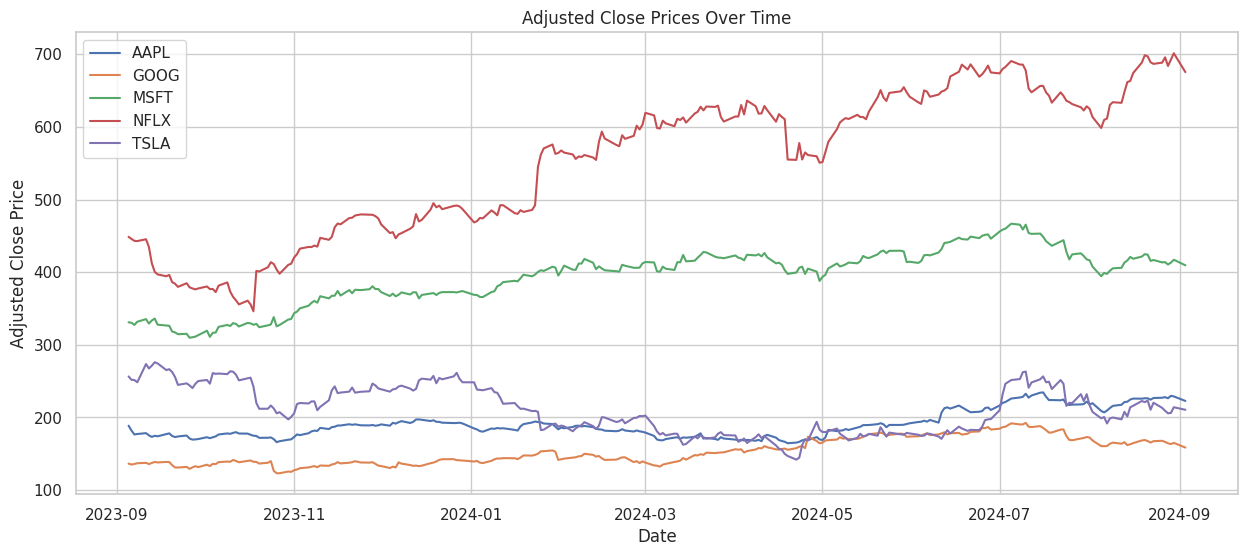

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# plotting the adjusted close prices for each ticker over time
plt.figure(figsize=(15, 6))
for ticker in stock_data['Ticker'].unique():
    subset = stock_data[stock_data['Ticker'] == ticker]
    plt.plot(subset.index, subset['Adj Close'], label=ticker)

plt.title('Adjusted Close Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()

The first graph shows the adjusted closing prices of five different stocks:
- AAPL (Apple Inc.)
- GOOG (Alphabet Inc.)
- MSFT (Microsoft Corporation)
- NFLX (Netflix, Inc.)
and TSLA (Tesla, Inc.)

GOOG appears to have the highest price and shows a general uptrend throughout the period, despite some volatility. TSLA and AAPL also exhibit an uptrend, with AAPL’s stock price increasing more steadily. MSFT and NFLX display relatively lower prices compared to the others, with NFLX showing considerable fluctuation but remaining mostly flat, and MSFT demonstrating a slight downtrend towards the end of the period.

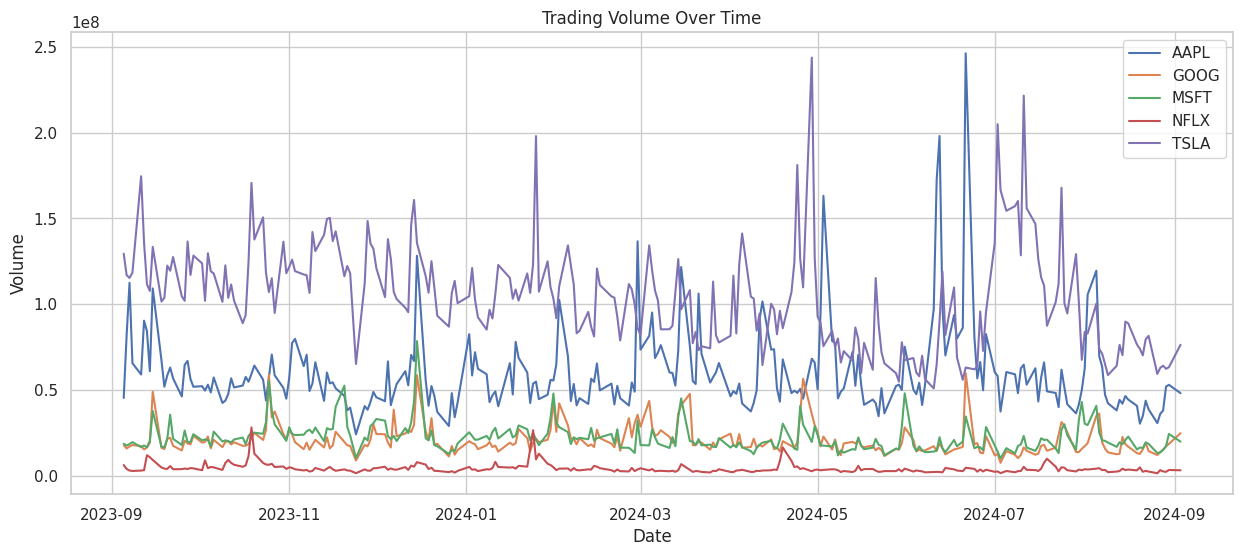

In [34]:
# plotting the trading volume for each ticker over time
plt.figure(figsize=(15, 6))
for ticker in stock_data['Ticker'].unique():
    subset = stock_data[stock_data['Ticker'] == ticker]
    plt.plot(subset.index, subset['Volume'], label=ticker)

plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

From the second graph, it is evident that AAPL and TSLA have the highest and most volatile trading volumes, with TSLA showing particularly large spikes. It suggests significant investor interest or reactions to events during those times. GOOG, while having the highest stock price, shows moderate and relatively stable trading volume. MSFT and NFLX have lower and less volatile trading volumes in comparison to AAPL and TSLA. The spikes and dips in trading volumes could correspond to earnings reports, product announcements, or other market-moving events for these companies.

# Detecting Anomalies in the Stock Market

Given the variability and trends observed in both adjusted close prices and trading volumes, anomaly detection can focus on identifying:
- Significant price movements that deviate from the stock’s typical price range or trend.
- Unusual trading volumes that stand out from the normal trading activity.

For the task of stock market anomaly detection, we can use the Z-score method, which identifies anomalies based on how many standard deviations away a data point is from the mean. A common threshold for identifying an anomaly is a Z-score greater than 2 or less than -2, which corresponds to data points that are more than 2 standard deviations away from the mean.

We will compute the Z-scores for both the adjusted close prices and trading volumes for each stock and then identify any data points that exceed this threshold:

In [35]:
from scipy.stats import zscore

def detect_anomalies(df, column):
    df_copy = df.copy()

    # calculate Z-scores and add them as a new column
    df_copy['Z-score'] = zscore(df_copy[column])

    # find where the absolute Z-score is greater than 2 (common threshold for anomalies)
    anomalies = df_copy[abs(df_copy['Z-score']) > 2]
    return anomalies

anomalies_adj_close = pd.DataFrame()
anomalies_volume = pd.DataFrame()

for ticker in stock_data['Ticker'].unique():
    data_ticker = stock_data[stock_data['Ticker'] == ticker]

    adj_close_anomalies = detect_anomalies(data_ticker, 'Adj Close')
    volume_anomalies = detect_anomalies(data_ticker, 'Volume')

    # use concat instead of append
    anomalies_adj_close = pd.concat([anomalies_adj_close, adj_close_anomalies])
    anomalies_volume = pd.concat([anomalies_volume, volume_anomalies])

In [36]:
anomalies_adj_close

Attribute,Ticker,Adj Close,Close,High,Low,Open,Volume,Z-score
Date,,,,,,,,
2024-07-08 00:00:00+00:00,AAPL,227.556610,227.820007,227.850006,223.250000,227.089996,59085900.0,2.003798
2024-07-09 00:00:00+00:00,AAPL,228.415604,228.679993,229.399994,226.369995,227.929993,48076100.0,2.049841
2024-07-10 00:00:00+00:00,AAPL,232.710632,232.979996,233.080002,229.250000,229.300003,62627700.0,2.280058
2024-07-12 00:00:00+00:00,AAPL,230.273453,230.539993,232.639999,228.679993,228.919998,53046500.0,2.149423
2024-07-15 00:00:00+00:00,AAPL,234.128998,234.399994,237.229996,233.089996,236.479996,62631300.0,2.356084
2024-07-16 00:00:00+00:00,AAPL,234.548523,234.820007,236.270004,232.330002,235.000000,43234300.0,2.378570
2024-07-17 00:00:00+00:00,AAPL,228.615387,228.880005,231.460007,226.639999,229.449997,57345900.0,2.060549
2024-08-27 00:00:00+00:00,AAPL,228.029999,228.029999,228.850006,224.889999,226.000000,35934600.0,2.029172
2024-08-29 00:00:00+00:00,AAPL,229.789993,229.789993,232.919998,228.880005,230.100006,51906300.0,2.123509


In [37]:
anomalies_volume

Attribute,Ticker,Adj Close,Close,High,Low,Open,Volume,Z-score
Date,,,,,,,,
2023-09-07 00:00:00+00:00,AAPL,176.656036,177.559998,178.210007,173.539993,175.179993,112488800.0,2.097836
2023-12-15 00:00:00+00:00,AAPL,196.823120,197.570007,198.399994,197.000000,197.529999,128256700.0,2.727016
2024-02-29 00:00:00+00:00,AAPL,180.296478,180.750000,182.570007,179.529999,181.270004,136682600.0,3.063231
2024-03-15 00:00:00+00:00,AAPL,172.186874,172.619995,172.619995,170.289993,171.169998,121664700.0,2.463978
2024-05-03 00:00:00+00:00,AAPL,182.919876,183.380005,187.000000,182.660004,186.649994,163224100.0,4.122305
2024-06-11 00:00:00+00:00,AAPL,206.910492,207.149994,207.160004,193.630005,193.649994,172373300.0,4.487381
2024-06-12 00:00:00+00:00,AAPL,212.823669,213.070007,220.199997,206.899994,207.369995,198134300.0,5.515311
2024-06-21 00:00:00+00:00,AAPL,207.250122,207.490005,211.889999,207.110001,210.389999,246421400.0,7.442090
2024-08-05 00:00:00+00:00,AAPL,209.028061,209.270004,213.500000,196.000000,199.089996,119548600.0,2.379541


Now, let’s plot the adjusted close prices and trading volumes again for each company, highlighting the anomalies we detected:

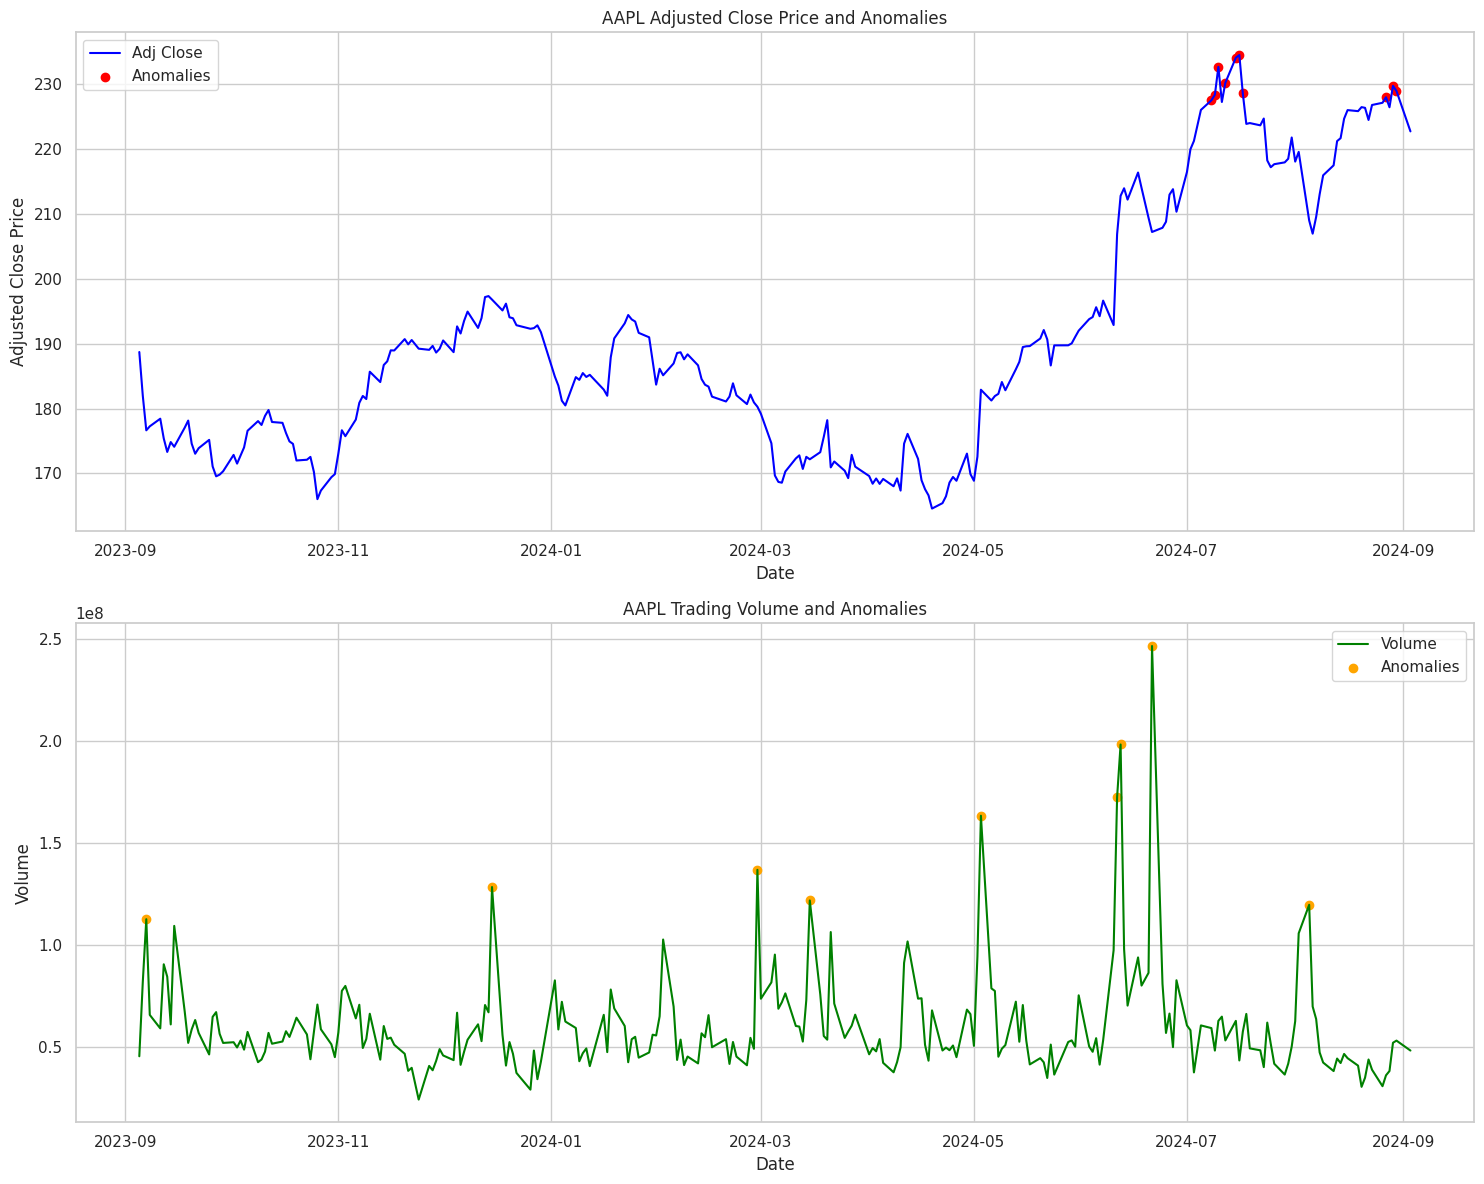

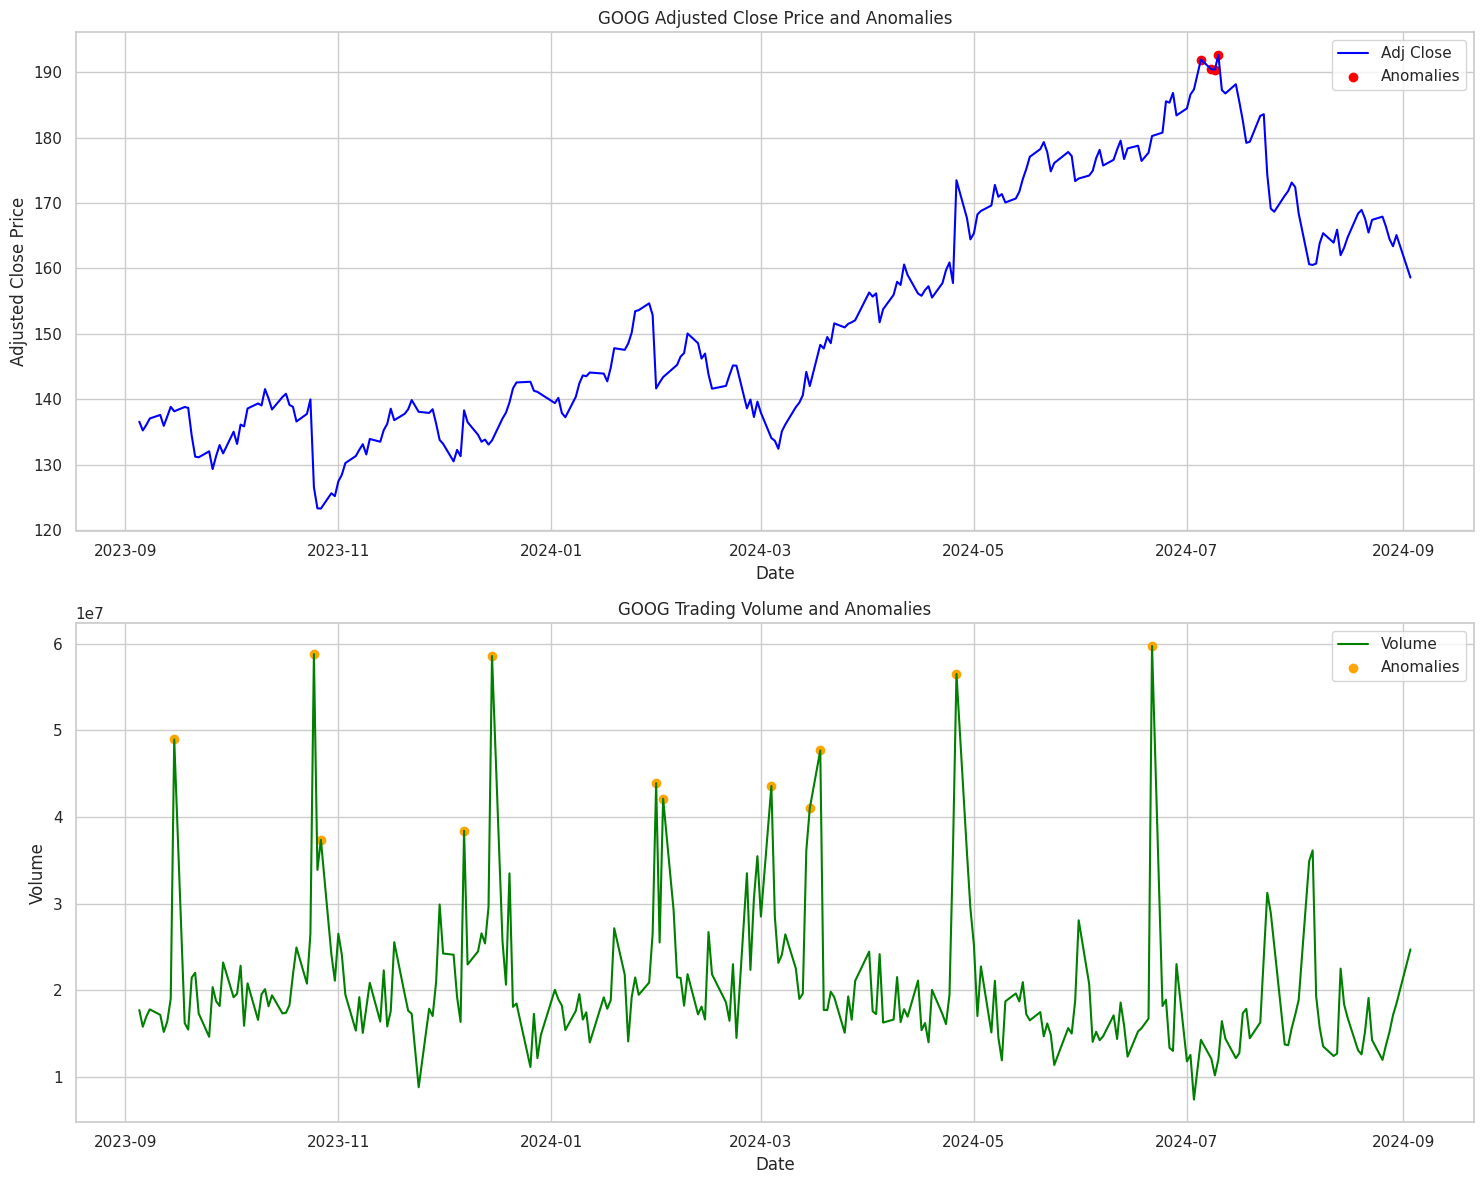

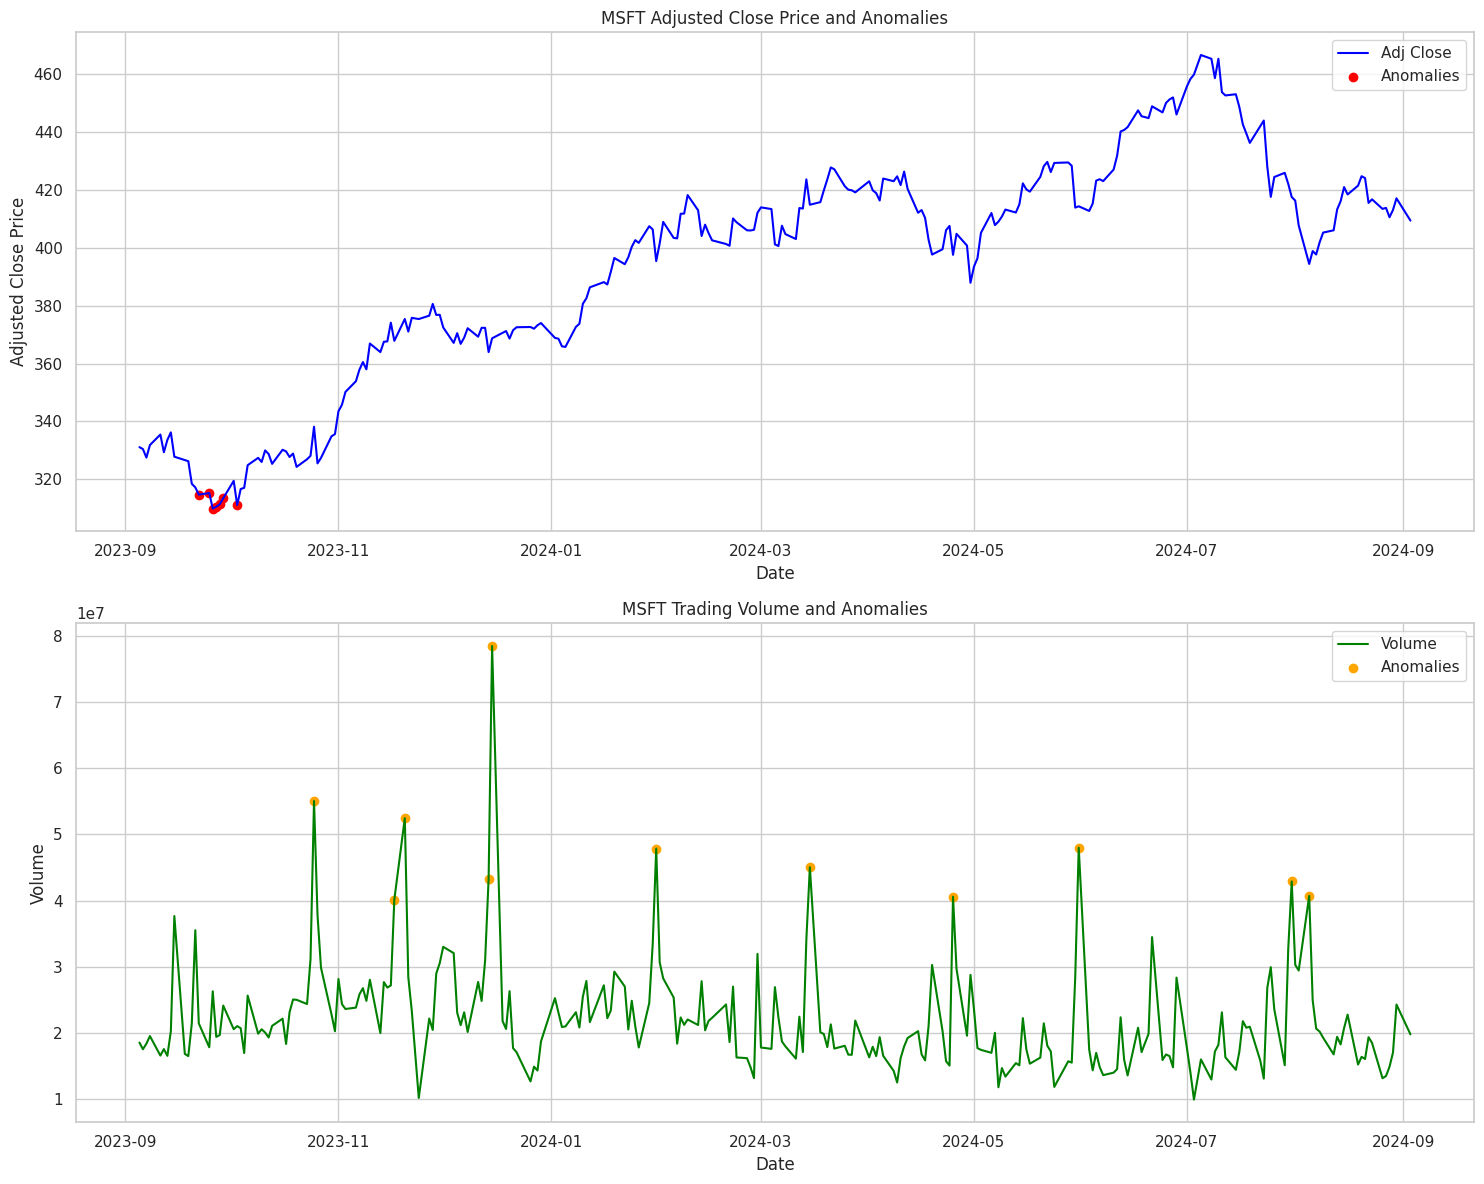

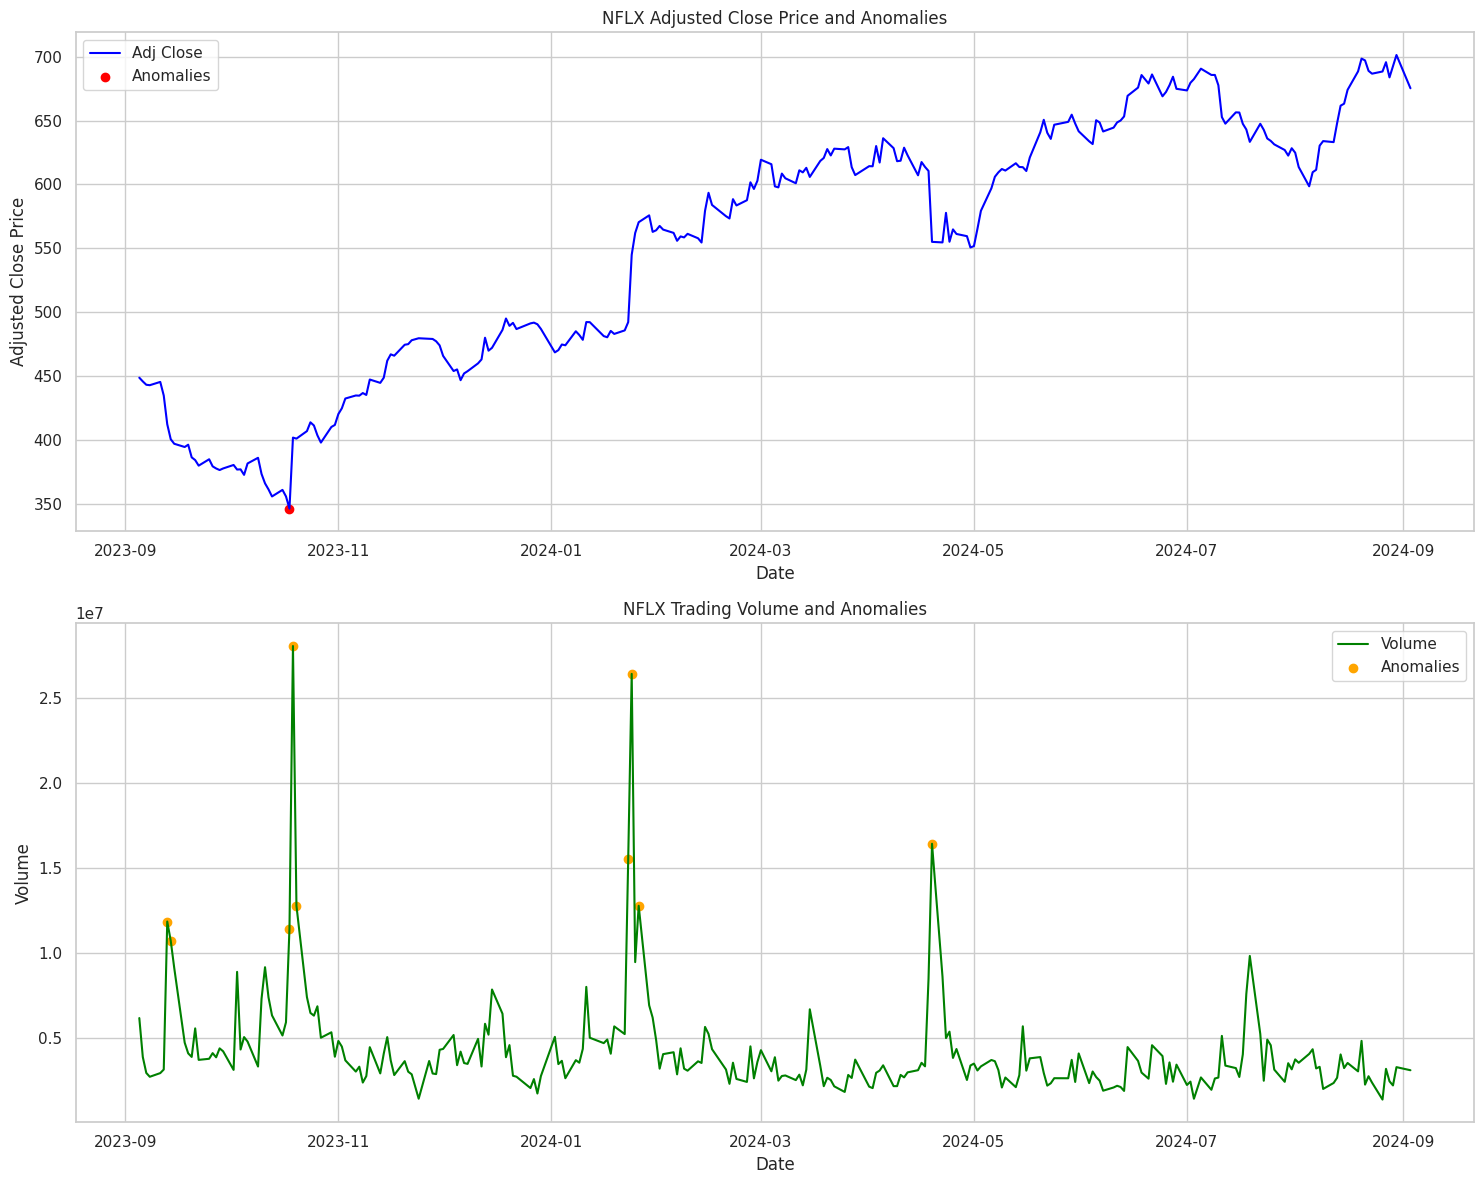

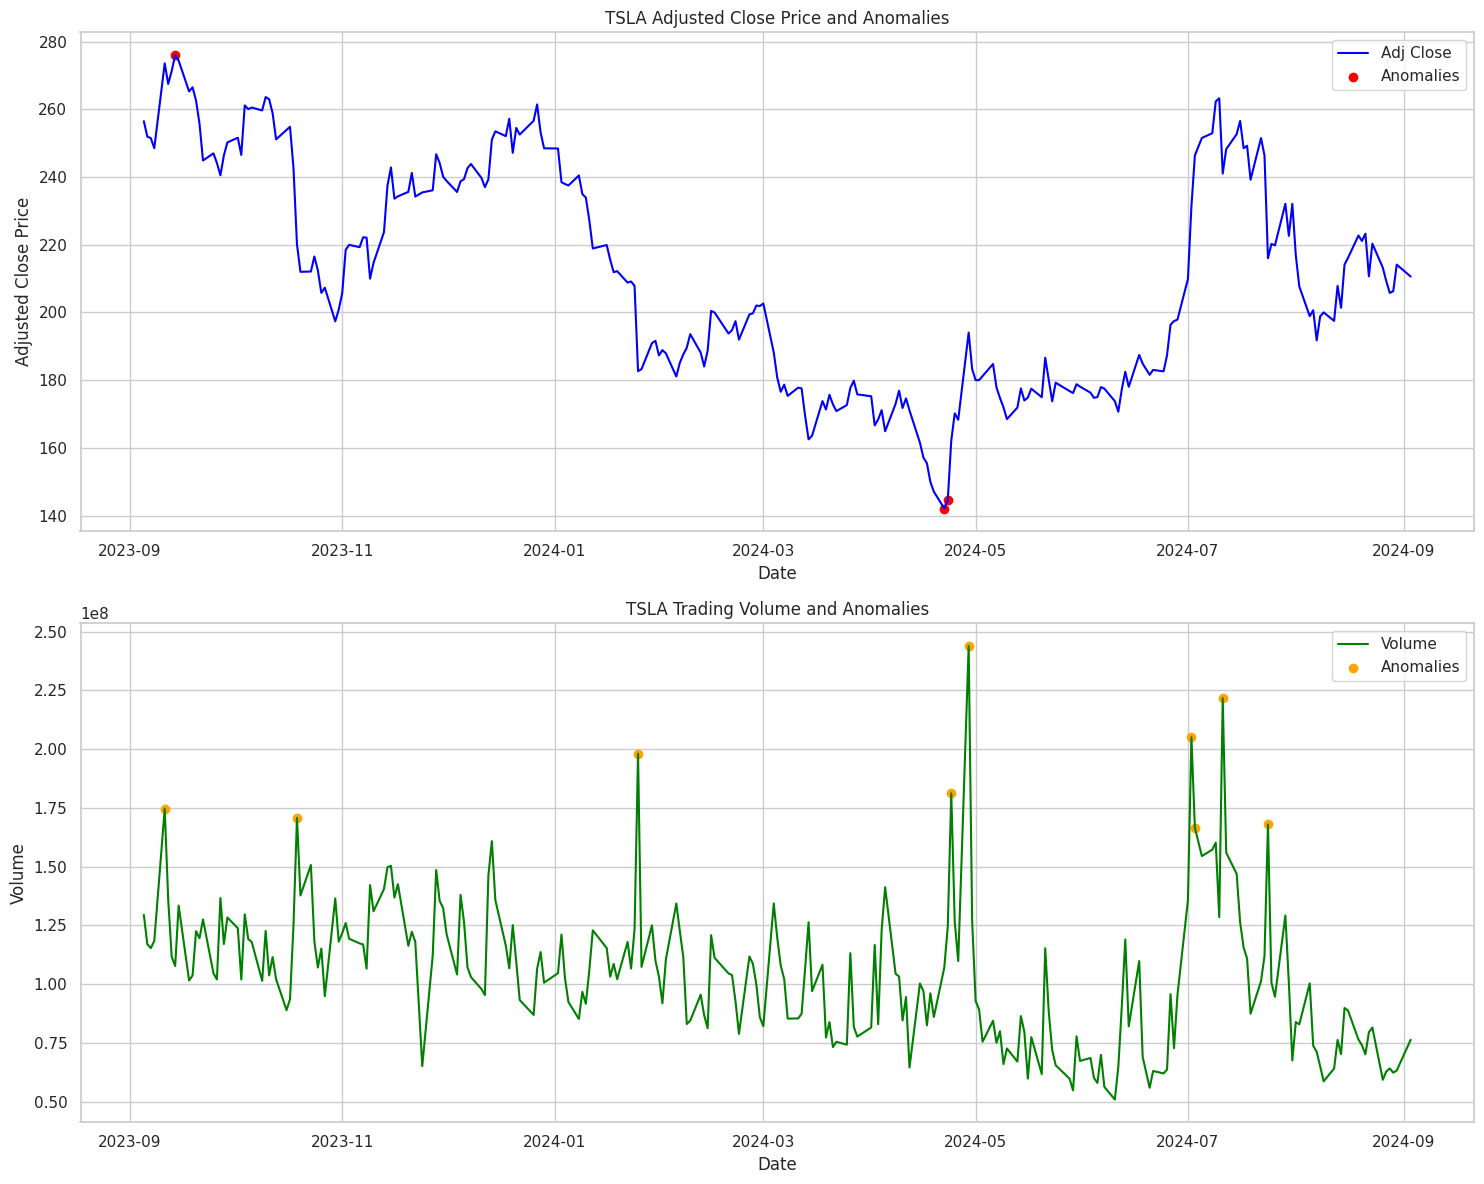

In [38]:
def plot_anomalies(ticker, anomalies_adj_close, anomalies_volume):
    # Filter the main and anomalies data for the given ticker
    data_ticker = stock_data[stock_data['Ticker'] == ticker]
    adj_close_anomalies = anomalies_adj_close[anomalies_adj_close['Ticker'] == ticker]
    volume_anomalies = anomalies_volume[anomalies_volume['Ticker'] == ticker]

    # plotting
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

    # adjusted close price
    ax1.plot(data_ticker.index, data_ticker['Adj Close'], label='Adj Close', color='blue')
    ax1.scatter(adj_close_anomalies.index, adj_close_anomalies['Adj Close'], color='red', label='Anomalies')
    ax1.set_title(f'{ticker} Adjusted Close Price and Anomalies')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Adjusted Close Price')
    ax1.legend()

    # volume
    ax2.plot(data_ticker.index, data_ticker['Volume'], label='Volume', color='green')
    ax2.scatter(volume_anomalies.index, volume_anomalies['Volume'], color='orange', label='Anomalies')
    ax2.set_title(f'{ticker} Trading Volume and Anomalies')
    ax2.set_xlabel('Date')
    ax2.set_ylabel('Volume')
    ax2.legend()

    plt.tight_layout()
    plt.show()

# plot anomalies for each ticker
for ticker in stock_data['Ticker'].unique():
    plot_anomalies(ticker, anomalies_adj_close, anomalies_volume)

The above charts for each company display the adjusted close prices and trading volumes over time, with anomalies highlighted:
- Anomalies are marked in red and represent significant deviations from the typical price range. These could correspond to days with unexpected news, earnings reports, or market shifts.
- Anomalies in trading volume are marked in orange and indicate days with exceptionally high or low trading activity compared to the norm. Such spikes could be due to market events, announcements, or other factors influencing trader behaviour.

# Now, let’s analyze the correlation in the anomalies of all the companies:

In [39]:
# consolidate anomalies for adjusted close prices and volumes
all_anomalies_adj_close = anomalies_adj_close[['Ticker']].copy()
all_anomalies_adj_close['Adj Close Anomaly'] = 1  # indicator variable for anomalies
all_anomalies_adj_close

Attribute,Ticker,Adj Close Anomaly
Date,,
2024-07-08 00:00:00+00:00,AAPL,1
2024-07-09 00:00:00+00:00,AAPL,1
2024-07-10 00:00:00+00:00,AAPL,1
2024-07-12 00:00:00+00:00,AAPL,1
2024-07-15 00:00:00+00:00,AAPL,1
2024-07-16 00:00:00+00:00,AAPL,1
2024-07-17 00:00:00+00:00,AAPL,1
2024-08-27 00:00:00+00:00,AAPL,1
2024-08-29 00:00:00+00:00,AAPL,1


In [40]:
all_anomalies_volume = anomalies_volume[['Ticker']].copy()
all_anomalies_volume['Volume Anomaly'] = 1  # indicator variable for anomalies
all_anomalies_volume

Attribute,Ticker,Volume Anomaly
Date,,
2023-09-07 00:00:00+00:00,AAPL,1
2023-12-15 00:00:00+00:00,AAPL,1
2024-02-29 00:00:00+00:00,AAPL,1
2024-03-15 00:00:00+00:00,AAPL,1
2024-05-03 00:00:00+00:00,AAPL,1
2024-06-11 00:00:00+00:00,AAPL,1
2024-06-12 00:00:00+00:00,AAPL,1
2024-06-21 00:00:00+00:00,AAPL,1
2024-08-05 00:00:00+00:00,AAPL,1


In [41]:
# pivot these dataframes to have one row per date and columns for each ticker, filling non-anomalies with 0
adj_close_pivot = all_anomalies_adj_close.pivot_table(index=all_anomalies_adj_close.index, columns='Ticker',
                                                       fill_value=0, aggfunc='sum')
adj_close_pivot

Attribute                 Adj Close Anomaly                    
Ticker                                 AAPL GOOG MSFT NFLX TSLA
Date                                                           
2023-09-14 00:00:00+00:00                 0    0    0    0    1
2023-09-22 00:00:00+00:00                 0    0    1    0    0
2023-09-25 00:00:00+00:00                 0    0    1    0    0
2023-09-26 00:00:00+00:00                 0    0    1    0    0
2023-09-27 00:00:00+00:00                 0    0    1    0    0
2023-09-28 00:00:00+00:00                 0    0    1    0    0
2023-09-29 00:00:00+00:00                 0    0    1    0    0
2023-10-03 00:00:00+00:00                 0    0    1    0    0
2023-10-18 00:00:00+00:00                 0    0    0    1    0
2024-04-22 00:00:00+00:00                 0    0    0    0    1
2024-04-23 00:00:00+00:00                 0    0    0    0    1
2024-07-05 00:00:00+00:00                 0    1    0    0    0
2024-07-08 00:00:00+00:00                 1    1    0    0    0
2024-07-09 00:00:00+00:00                 1    1    0    0    0
2024-07-10 00:00:00+00:00                 1    1    0    0    0
2024-07-12 00:00:00+00:00                 1    0    0    0    0
2024-07-15 00:00:00+00:00                 1    0    0    0    0
2024-07-16 00:00:00+00:00                 1    0    0    0    0
2024-07-17 00:00:00+00:00                 1    0    0    0    0
2024-08-27 00:00:00+00:00                 1    0    0    0    0
2024-08-29 00:00:00+00:00                 1    0    0    0    0
2024-08-30 00:00:00+00:00                 1    0    0    0    0

In [42]:
volume_pivot = all_anomalies_volume.pivot_table(index=all_anomalies_volume.index, columns='Ticker',
                                                fill_value=0, aggfunc='sum')
volume_pivot

Attribute                 Volume Anomaly                    
Ticker                              AAPL GOOG MSFT NFLX TSLA
Date                                                        
2023-09-07 00:00:00+00:00              1    0    0    0    0
2023-09-11 00:00:00+00:00              0    0    0    0    1
2023-09-13 00:00:00+00:00              0    0    0    1    0
2023-09-14 00:00:00+00:00              0    0    0    1    0
2023-09-15 00:00:00+00:00              0    1    0    0    0
2023-10-18 00:00:00+00:00              0    0    0    1    0
2023-10-19 00:00:00+00:00              0    0    0    1    1
2023-10-20 00:00:00+00:00              0    0    0    1    0
2023-10-25 00:00:00+00:00              0    1    1    0    0
2023-10-27 00:00:00+00:00              0    1    0    0    0
2023-11-17 00:00:00+00:00              0    0    1    0    0
2023-11-20 00:00:00+00:00              0    0    1    0    0
2023-12-07 00:00:00+00:00              0    1    0    0    0
2023-12-14 00:00:00+00:00              0    0    1    0    0
2023-12-15 00:00:00+00:00              1    1    1    0    0
2024-01-23 00:00:00+00:00              0    0    0    1    0
2024-01-24 00:00:00+00:00              0    0    0    1    0
2024-01-25 00:00:00+00:00              0    0    0    0    1
2024-01-26 00:00:00+00:00              0    0    0    1    0
2024-01-31 00:00:00+00:00              0    1    1    0    0
2024-02-02 00:00:00+00:00              0    1    0    0    0
2024-02-29 00:00:00+00:00              1    0    0    0    0
2024-03-04 00:00:00+00:00              0    1    0    0    0
2024-03-15 00:00:00+00:00              1    1    1    0    0
2024-03-18 00:00:00+00:00              0    1    0    0    0
2024-04-19 00:00:00+00:00              0    0    0    1    0
2024-04-24 00:00:00+00:00              0    0    0    0    1
2024-04-25 00:00:00+00:00              0    0    1    0    0
2024-04-26 00:00:00+00:00              0    1    0    0    0
2024-04-29 00:00:00+00:00              0    0    0    0    1
2024-05-03 00:00:00+00:00              1    0    0    0    0
2024-05-31 00:00:00+00:00              0    0    1    0    0
2024-06-11 00:00:00+00:00              1    0    0    0    0
2024-06-12 00:00:00+00:00              1    0    0    0    0
2024-06-21 00:00:00+00:00              1    1    0    0    0
2024-07-02 00:00:00+00:00              0    0    0    0    1
2024-07-03 00:00:00+00:00              0    0    0    0    1
2024-07-11 00:00:00+00:00              0    0    0    0    1
2024-07-24 00:00:00+00:00              0    0    0    0    1
2024-07-31 00:00:00+00:00              0    0    1    0    0
2024-08-05 00:00:00+00:00              1    0    1    0    0

In [43]:
# flatten the multi-level column index
adj_close_pivot.columns = adj_close_pivot.columns.get_level_values(1)
volume_pivot.columns = volume_pivot.columns.get_level_values(1)

In [44]:
# combine the two pivoted dataframes
combined_anomalies = pd.concat([adj_close_pivot, volume_pivot], axis=1, keys=['Adj Close Anomaly', 'Volume Anomaly'])
combined_anomalies

Adj Close Anomaly                      \
Ticker                                 AAPL GOOG MSFT NFLX TSLA   
Date                                                              
2023-09-07 00:00:00+00:00               NaN  NaN  NaN  NaN  NaN   
2023-09-11 00:00:00+00:00               NaN  NaN  NaN  NaN  NaN   
2023-09-13 00:00:00+00:00               NaN  NaN  NaN  NaN  NaN   
2023-09-14 00:00:00+00:00               0.0  0.0  0.0  0.0  1.0   
2023-09-15 00:00:00+00:00               NaN  NaN  NaN  NaN  NaN   
...                                     ...  ...  ...  ...  ...   
2024-07-31 00:00:00+00:00               NaN  NaN  NaN  NaN  NaN   
2024-08-05 00:00:00+00:00               NaN  NaN  NaN  NaN  NaN   
2024-08-27 00:00:00+00:00               1.0  0.0  0.0  0.0  0.0   
2024-08-29 00:00:00+00:00               1.0  0.0  0.0  0.0  0.0   
2024-08-30 00:00:00+00:00               1.0  0.0  0.0  0.0  0.0   

                          Volume Anomaly                      
Ticker                              AAPL GOOG MSFT NFLX TSLA  
Date                                                          
2023-09-07 00:00:00+00:00            1.0  0.0  0.0  0.0  0.0  
2023-09-11 00:00:00+00:00            0.0  0.0  0.0  0.0  1.0  
2023-09-13 00:00:00+00:00            0.0  0.0  0.0  1.0  0.0  
2023-09-14 00:00:00+00:00            0.0  0.0  0.0  1.0  0.0  
2023-09-15 00:00:00+00:00            0.0  1.0  0.0  0.0  0.0  
...                                  ...  ...  ...  ...  ...  
2024-07-31 00:00:00+00:00            0.0  0.0  1.0  0.0  0.0  
2024-08-05 00:00:00+00:00            1.0  0.0  1.0  0.0  0.0  
2024-08-27 00:00:00+00:00            NaN  NaN  NaN  NaN  NaN  
2024-08-29 00:00:00+00:00            NaN  NaN  NaN  NaN  NaN  
2024-08-30 00:00:00+00:00            NaN  NaN  NaN  NaN  NaN  

[61 rows x 10 columns]

In [45]:
# calculate the correlation matrix for the anomalies
correlation_matrix = combined_anomalies.corr()
correlation_matrix

Adj Close Anomaly                                \
Ticker                                AAPL      GOOG      MSFT      NFLX   
                  Ticker                                                   
Adj Close Anomaly AAPL            1.000000  0.279715 -0.623610 -0.199205   
                  GOOG            0.279715  1.000000 -0.322031 -0.102869   
                  MSFT           -0.623610 -0.322031  1.000000 -0.149071   
                  NFLX           -0.199205 -0.102869 -0.149071  1.000000   
                  TSLA           -0.362738 -0.187317 -0.271448 -0.086711   
Volume Anomaly    AAPL                 NaN       NaN       NaN       NaN   
                  GOOG                 NaN       NaN       NaN       NaN   
                  MSFT                 NaN       NaN       NaN       NaN   
                  NFLX                 NaN       NaN       NaN       NaN   
                  TSLA                 NaN       NaN       NaN       NaN   

                                   Volume Anomaly                      \
Ticker                        TSLA           AAPL      GOOG      MSFT   
                  Ticker                                                
Adj Close Anomaly AAPL   -0.362738            NaN       NaN       NaN   
                  GOOG   -0.187317            NaN       NaN       NaN   
                  MSFT   -0.271448            NaN       NaN       NaN   
                  NFLX   -0.086711            NaN       NaN       NaN   
                  TSLA    1.000000            NaN       NaN       NaN   
Volume Anomaly    AAPL         NaN       1.000000  0.047381  0.077850   
                  GOOG         NaN       0.047381  1.000000  0.094429   
                  MSFT         NaN       0.077850  0.094429  1.000000   
                  NFLX         NaN      -0.281250 -0.341144 -0.321131   
                  TSLA         NaN      -0.281250 -0.341144 -0.321131   

                                              
Ticker                        NFLX      TSLA  
                  Ticker                      
Adj Close Anomaly AAPL         NaN       NaN  
                  GOOG         NaN       NaN  
                  MSFT         NaN       NaN  
                  NFLX         NaN       NaN  
                  TSLA         NaN       NaN  
Volume Anomaly    AAPL   -0.281250 -0.281250  
                  GOOG   -0.341144 -0.341144  
                  MSFT   -0.321131 -0.321131  
                  NFLX    1.000000 -0.138889  
                  TSLA   -0.138889  1.000000

- AAPL has a low positive correlation with GOOG and a negative correlation with NFLX in terms of adjusted close price anomalies. It suggests that price movements in AAPL have some level of simultaneous occurrence with GOOG but move inversely with NFLX. On the other hand, GOOG and NFLX show a strong negative correlation, indicating that when one experiences an anomalous price increase (or decrease), the other tends to move in the opposite direction.
- In trading volumes, GOOG shows a positive correlation with MSFT in trading volume anomalies, suggesting that these companies might have simultaneous unusual trading activities. AAPL’s volume anomalies have a negative correlation with other companies like NFLX and TSLA, indicating that when AAPL experiences unusual trading volume, these companies tend to have opposite anomalies in their trading volumes.

# Analyzing the Risk of Anomalies

Now, let’s rate each stock based on the risk inferred from the anomalies detected. For this task, we can consider the frequency and magnitude of these anomalies. A stock could be considered more risky if it has frequent and large anomalies in its price or volume. Here’s how we can approach this:

- Frequency of Anomalies: A higher number of anomalies may indicate a higher risk.
- Magnitude of Anomalies: Larger deviations from the mean (higher absolute Z-scores) suggest higher risk.

We can compute a risk score for each stock by combining these factors. For simplicity, we could average the absolute Z-scores of anomalies for each stock and then normalize these scores across all stocks to get a risk rating:

In [47]:
# calculate the mean absolute Z-score for each stock as a risk indicator
adj_close_risk = anomalies_adj_close.groupby('Ticker')['Z-score'].apply(lambda x: abs(x).mean())
volume_risk = anomalies_volume.groupby('Ticker')['Z-score'].apply(lambda x: abs(x).mean())

In [48]:
adj_close_risk

,Z-score
Ticker,
AAPL,2.151217
GOOG,2.136627
MSFT,2.095303
NFLX,2.059562
TSLA,2.045611


In [49]:
volume_risk

,Z-score
Ticker,
AAPL,3.810965
GOOG,3.331769
MSFT,3.297932
NFLX,3.977753
TSLA,2.913169


In [50]:
# combine the risk scores from both price and volume anomalies
total_risk = adj_close_risk + volume_risk
total_risk

,Z-score
Ticker,
AAPL,5.962182
GOOG,5.468396
MSFT,5.393234
NFLX,6.037315
TSLA,4.958780


In [51]:
# normalize the risk scores to get a relative risk rating from 0 to 1
risk_rating = (total_risk - total_risk.min()) / (total_risk.max() - total_risk.min())
risk_rating

,Z-score
Ticker,
AAPL,0.930338
GOOG,0.472508
MSFT,0.402819
NFLX,1.000000
TSLA,0.000000


Accurate Interpretation:
- AAPL (0.930338): Apple’s stock has a very high-risk score, close to the maximum value (1.00). This indicates significant price and volume anomalies. Compared to other stocks, Apple is on the higher-risk end.
- GOOG (0.472508): Google’s stock shows moderate risk, slightly higher than MSFT and TSLA. However, it is still much lower than NFLX and AAPL, indicating anomalies but not overly significant ones.
- MSFT (0.402819): Microsoft has a lower risk level compared to AAPL and NFLX, indicating fewer anomalies in trading. However, it still sits at a moderate level and is not the lowest-risk stock.
- NFLX (1.000000): Netflix has the highest risk score, with a maximum rating of 1.00. This indicates the largest anomalies in both price and volume among all the listed stocks. It is the riskiest stock in the list.
- TSLA (0.000000): Tesla’s stock has the lowest risk score (0.00), suggesting very few or no significant anomalies in its price and volume trading data.

Summary:
NFLX and AAPL are the two highest-risk stocks, indicating significant trading anomalies.
MSFT and GOOG are at moderate risk levels, with some anomalies but not as severe.
TSLA has the lowest risk score, showing virtually no anomalies in trading.

# Summary

So, this is how you can detect, analyze, and interpret the anomalies in the stock market. Anomalies in the stock market are important because they can indicate opportunities or risks. For example, a sudden spike in a stock’s price could be due to positive news about the company or its industry, which signals a potential investment opportunity. Conversely, an unexpected price drop could warn of underlying issues or market sentiment changes, which signals a risk that investors may need to manage.